# Intuition

**GARCH**: **G**eneralized **A**uto**R**egressive **H**eteroskedasticity

Simple processes:

1. AR(1)
$$
y_{t} = \phi y_{t-1} + \varepsilon_{t}
$$
2. ARMA(1,1)
$$
y_{t} = \beta y_{t-1} + \phi \varepsilon_{t-1} + \varepsilon_{t}
$$
3. ARCH(1)
$$
y_{t} = \varepsilon_{t}\sqrt{\alpha + \alpha_{1}y_{t-1}^2} = \varepsilon_{t}\sigma_{t}
$$
4. GARCH(1,1)
$$
y_{t} = \varepsilon_{t}\sqrt{\alpha + \alpha_{1}y_{t-1}^2 + \beta_{1}\sigma_{t-1}^2} = \varepsilon_{t}\sigma_{t}
$$

# Toy example

In [83]:
# import libraries
from random import gauss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as web
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

**GARCH(2,2)** (based on `arch` library notations)
$$
y_{t} = \varepsilon_{t}\sqrt{\omega + \alpha_{1}y_{t-1}^2 + \alpha_{2}y_{t-2}^2 + \beta_{1}\sigma_{t-1}^2  + \beta_{2}\sigma_{t-2}^2}
$$
$$
y_{0}, y_{1} \sim \mathcal{N}(0,1)
$$
$$
\sigma_{0} = 1, \sigma_{1} = 1
$$
$$
\varepsilon_{t} \sim \mathcal{N}(0,1)
$$

In [84]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n * 0.3)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 +\
                      beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

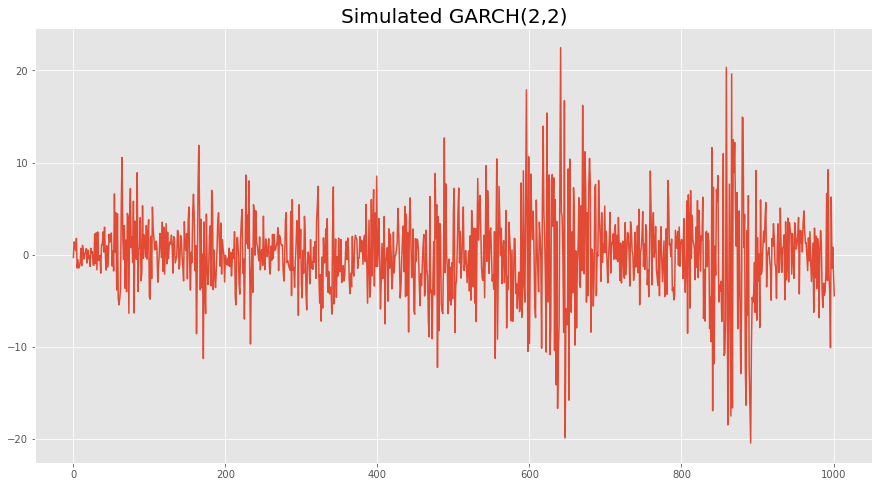

In [85]:
plt.figure(figsize=(15,8));
plt.plot(series);
plt.title('Simulated GARCH(2,2)', fontsize = 20);

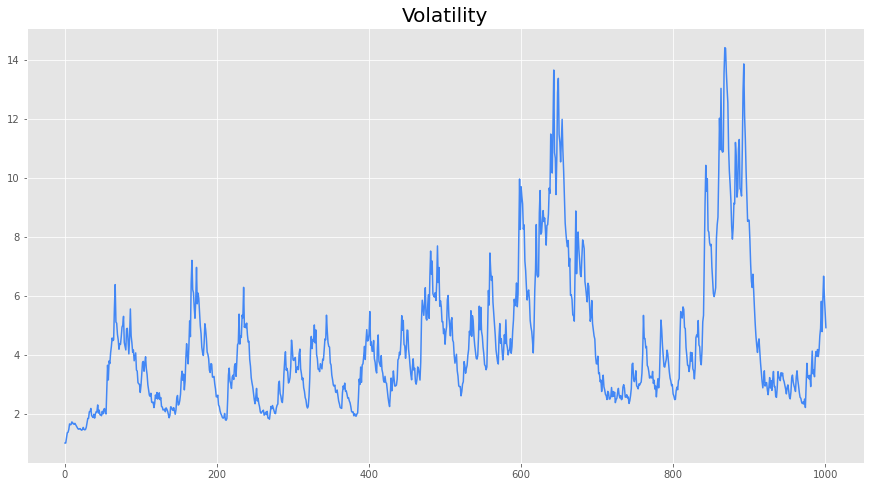

In [86]:
plt.figure(figsize=(15,8))
plt.plot(vols, color="#4287f5");
plt.title('Volatility', fontsize=20);

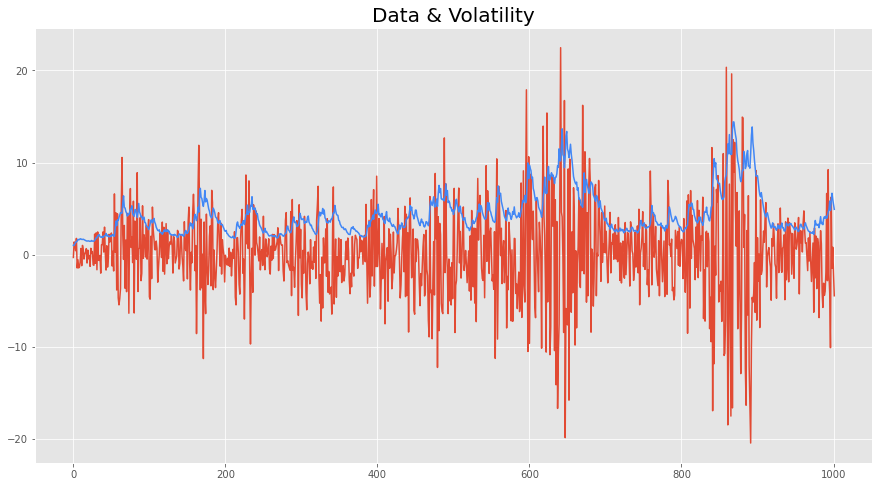

In [87]:
plt.figure(figsize=(15,8));
plt.plot(series);
plt.plot(vols, color='#4287f5');
plt.title('Data & Volatility', fontsize=20);

## PACF plot

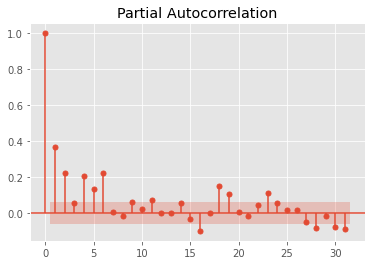

In [88]:
plot_pacf(np.array(series)**2);

In [89]:
# 700 training, 300 testing
train, test = series[:-test_size], series[-test_size:]

In [90]:
model = arch_model(train, p=2, q=2)

In [91]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 37665.20303501902
Iteration:      2,   Func. Count:     17,   Neg. LLF: 266739.8913951006
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2191.329378008628
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1918.215402624043
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1915.9406602650513
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1913.7406138337296
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1913.4716893263649
Iteration:      8,   Func. Count:     65,   Neg. LLF: 1913.4408103568321
Iteration:      9,   Func. Count:     72,   Neg. LLF: 1913.4220444575494
Iteration:     10,   Func. Count:     79,   Neg. LLF: 1913.4080802012586
Iteration:     11,   Func. Count:     86,   Neg. LLF: 1913.4074756309424
Iteration:     12,   Func. Count:     93,   Neg. LLF: 1913.4074620645165
Iteration:     13,   Func. Count:     99,   Neg. LLF: 1913.4074617606489
Optimization terminated successfully    (Exit mode 0)
 

In [92]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1913.41
Distribution:                  Normal   AIC:                           3838.81
Method:            Maximum Likelihood   BIC:                           3866.14
                                        No. Observations:                  702
Date:                Tue, Feb 23 2021   Df Residuals:                      701
Time:                        20:48:45   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1505      0.104      1.450      0.147 [-5.289e-02,  0.354]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3876      0.221      1.756  7.902e-02 [-4.492e-02,  0.820]
alpha[1]       0.1323  4.731e-02      2.797  5.163e-03  [3.959e-02,  0.225]
alpha[2]       0.2006  4.229e-02      4.742  2.112e-06    [  0.118,  0.283]
beta[1]        0.1139      0.133      0.859      0.391    [ -0.146,  0.374]
beta[2]        0.5533      0.114      4.868  1.127e-06    [  0.331,  0.776]
===========================================================================

Covariance estimator: robust
"""

## Prediction

In [93]:
predictions = model_fit.forecast(horizon=test_size)

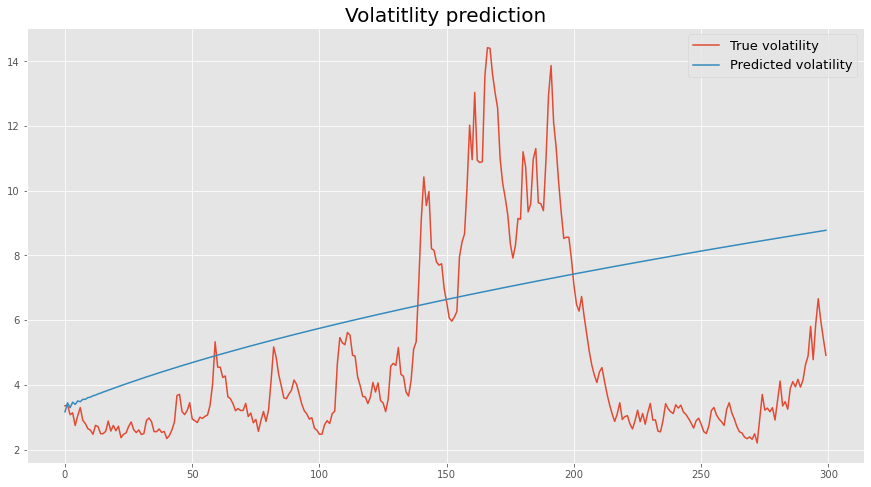

In [94]:
plt.figure(figsize=(15,8));
true, = plt.plot(vols[-test_size:]);
preds, = plt.plot(np.sqrt(predictions.variance.values[-1,:]));
plt.title('Volatitlity prediction', fontsize=20);
plt.legend(['True volatility', 'Predicted volatility'], fontsize=13);

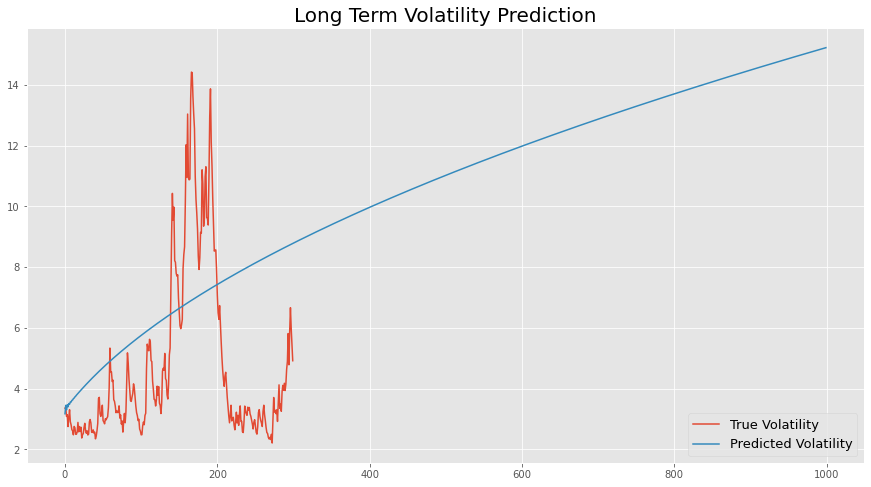

In [95]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(15,8));
true, = plt.plot(vols[-test_size:]);
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]));
plt.title('Long Term Volatility Prediction', fontsize=20);
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=13);

## Rolling forecast

In [96]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

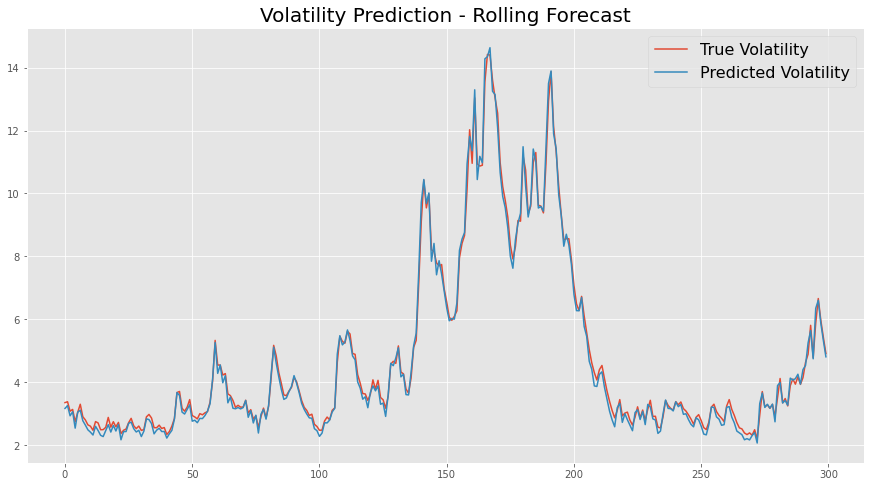

In [97]:
plt.figure(figsize=(15,8))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Stock Forecast (example)

In [98]:
start = datetime(2015, 1, 1)
end = datetime(2021, 1, 1)

## Disney stock volatility

In [99]:
dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [100]:
returns = 100 * dis.Close.pct_change().dropna()

In [101]:
plt.figure(figsize=(15,8));
plt.plot(returns);
plt.ylabel('Pct Return', fontsize=16);
plt.title('DIS Returns', fontsize=20);

## PACF

In [102]:
plot_pacf(returns**2);

## Fit GARCH(3,3)

In [103]:
model = arch_model(returns, p=3, q=3);

In [104]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 7490.91318168534
Iteration:      2,   Func. Count:     24,   Neg. LLF: 347615382088.78064
Iteration:      3,   Func. Count:     36,   Neg. LLF: 3625.0787157902637
Iteration:      4,   Func. Count:     47,   Neg. LLF: 3246.073485105466
Iteration:      5,   Func. Count:     58,   Neg. LLF: 2797.934207461302
Iteration:      6,   Func. Count:     68,   Neg. LLF: 2728.692870976524
Iteration:      7,   Func. Count:     78,   Neg. LLF: 2690.4741060014317
Iteration:      8,   Func. Count:     88,   Neg. LLF: 2690.0470327750445
Iteration:      9,   Func. Count:     98,   Neg. LLF: 2702.9432189254594
Iteration:     10,   Func. Count:    108,   Neg. LLF: 2684.05258770979
Iteration:     11,   Func. Count:    118,   Neg. LLF: 2685.3847736984258
Iteration:     12,   Func. Count:    128,   Neg. LLF: 2681.5401966135028
Iteration:     13,   Func. Count:    137,   Neg. LLF: 2681.8349603083934
Iteration:     14,   Func. Count:    147,   Neg. LLF: 2681

In [105]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2681.11
Distribution:                  Normal   AIC:                           5378.22
Method:            Maximum Likelihood   BIC:                           5420.78
                                        No. Observations:                 1511
Date:                Tue, Feb 23 2021   Df Residuals:                     1510
Time:                        20:49:27   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.9950e-03  4.095e-02      0.220      0.826 [-7.127e-02,8.926e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1306      0.109      1.198      0.231   [-8.303e-02,  0.344]
alpha[1]       0.0275  2.278e-02      1.207      0.227 [-1.716e-02,7.215e-02]
alpha[2]       0.0910      0.122      0.746      0.456      [ -0.148,  0.330]
alpha[3]       0.1206      0.167      0.723      0.470      [ -0.206,  0.447]
beta[1]    2.0094e-13      0.150  1.340e-12      1.000      [ -0.294,  0.294]
beta[2]        0.0204      0.192      0.106      0.915      [ -0.355,  0.396]
beta[3]        0.7205      0.125      5.766  8.127e-09      [  0.476,  0.965]
=============================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [106]:
model = arch_model(returns, p=3, q=0)

In [107]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5222.329757952289
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7475.2498174913435
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1884918.2888703472
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1469061.0970338942
Iteration:      5,   Func. Count:     39,   Neg. LLF: 10156.800467027555
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2755.002733825301
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2812.5323562754747
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2745.310105881631
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2735.1616622563024
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2735.0470702134016
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2735.0286739715166
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2735.0210446853634
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2735.018607745554
Iteration:     14,   Func. Count:     98,   Neg. LLF: 2

In [108]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2735.02
Distribution:                  Normal   AIC:                           5480.04
Method:            Maximum Likelihood   BIC:                           5506.64
                                        No. Observations:                 1511
Date:                Tue, Feb 23 2021   Df Residuals:                     1510
Time:                        20:49:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0113  4.612e-02      0.245      0.806 [-7.909e-02,  0.102]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.2841      0.339      3.793  1.487e-04      [  0.621,  1.948]
alpha[1]       0.0373  2.455e-02      1.521      0.128 [-1.077e-02,8.547e-02]
alpha[2]       0.3209      0.131      2.443  1.456e-02    [6.347e-02,  0.578]
alpha[3]       0.2679      0.161      1.665  9.594e-02   [-4.749e-02,  0.583]
=============================================================================

Covariance estimator: robust
"""

In [109]:
rolling_predictions = []
test_size = 365 # days

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [110]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [111]:
plt.figure(figsize=(15, 8));
true, = plt.plot(returns[-365:]);
preds, = plt.plot(rolling_predictions);
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20);
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16);

# References

* Kevin Sheppard, Stanislav Khrapov, Gábor Lipták, mikedeltalima, Rob Capellini, esvhd, … jbrockmendel. (2019, November 22). bashtage/arch: Release 4.11 (Version 4.11). Zenodo. http://doi.org/10.5281/zenodo.3551028
* Bollerslev, T. (1986). Generalized Autoregressive Conditional Heteroskedasticity. Journal of Econometrics. April, 31:3, pp. 307–27.
* Engle, R.F. (1982). Autoregressive Conditional Heteroscedasticity with Estimates of the Variance of United Kingdom Inflation. Econometrica. 50(4), 987-1007.